Data: https://www.kaggle.com/ronitf/heart-disease-uci 
Tutorial: https://www.bilibili.com/video/BV1Wf4y1U7EL?p=6

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('ProcessedHeart.csv')
df.tail()

Age  Resting Blood Pressure  Cholesterol  Max Heart Rate  St_depression  \
298   57                     140          241             123            0.2   
299   45                     110          264             132            1.2   
300   68                     144          193             141            3.4   
301   57                     130          131             115            1.2   
302   57                     130          236             174            0.0   

     # Major Vessels  Target  Gender_Female  Gender_Male  \
298                0       0              1            0   
299                0       0              0            1   
300                2       0              0            1   
301                1       0              0            1   
302                1       0              1            0   

     Chest Pain Type_asymptomatic  ...  Rest Ecg_normal  \
298                             0  ...                0   
299                             1  ...                0   
300                             0  ...                0   
301                             0  ...                0   
302                             0  ...                1   

     Exercise Induced Angina_No  Exercise Induced Angina_Yes  \
298                           0                            1   
299                           1                            0   
300                           1                            0   
301                           0                            1   
302                           1                            0   

     St_slope_downsloping  St_slope_flat  St_slope_unsloping  \
298                     0              1                   0   
299                     0              1                   0   
300                     0              1                   0   
301                     0              1                   0   
302                     0              1                   0   

     Thalassemia_fixed defect  Thalassemia_normal  \
298                         0                   0   
299                         0                   0   
300                         0                   0   
301                         0                   0   
302                         1                   0   

     Thalassemia_reversable defect  Thalassemia_unknwon  
298                              1                    0  
299                              1                    0  
300                              1                    0  
301                              1                    0  
302                              0                    0  

[5 rows x 27 columns]

In [3]:
# Seperate X & Y variables
X=df.drop('Target',axis=1)
Y=df.Target

In [4]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: Target, Length: 303, dtype: int64

In [5]:
# Seperate Training & Testing Data
from sklearn.model_selection import train_test_split

X_train, X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [6]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(242, 26) (61, 26) (242,) (61,)


### Model

##### 1. Random Forest

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
RandomForestClassifier?

In [9]:
model = RandomForestClassifier(max_depth=5,n_estimators=100,random_state=25)
model.fit(X_train,Y_train)

RandomForestClassifier(max_depth=5, random_state=25)

In [10]:
# Visualize a tree

print(len(model.estimators_))

estimator = model.estimators_[6]
estimator

100


DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=798482687)

In [11]:
# Convert feature to string
feature_names=X_train.columns
Y_train_str = Y_train.astype('str')
Y_train_str[Y_train_str=='0']='no disease'
Y_train_str[Y_train_str=='1']='disease'
Y_train_str = Y_train_str.values

In [12]:
from sklearn.tree import export_graphviz
export_graphviz(estimator, out_file='tree.dot', feature_names=feature_names,
               class_names = Y_train_str, rounded=True, proportion=True,
               label='root', precision=2, filled=True)

In [13]:
call?

Object `call` not found.


In [14]:
from subprocess import call
call(['dot','-Tpng','tree.dot','-o','tree.png','-Gdpi=600'])

# solve graphviz downloading & path probelm
# https://bobswift.atlassian.net/wiki/spaces/GVIZ/pages/20971549/How+to+install+Graphviz+software

0

In [15]:
from IPython.display import Image
Image(filename='tree.png')
# darker means better purity; blue-> disease, orange-> no disease

In [16]:
import eli5
eli5.show_weights(estimator,feature_names=feature_names.to_list())
# weight =0 some features are not used

#### Feature Importance Analysis

In [17]:
model.feature_importances_

array([0.05903212, 0.04517651, 0.04746922, 0.09485532, 0.0756487 ,
       0.16088556, 0.02588305, 0.0278592 , 0.00648754, 0.00975743,
       0.02026463, 0.12529087, 0.00302846, 0.00253767, 0.00827199,
       0.00087305, 0.00876416, 0.04474786, 0.03685719, 0.03008156,
       0.03698878, 0.00337579, 0.07633106, 0.00188398, 0.04685799,
       0.00079029])

In [18]:
print(" [ Feature Importance Order ] ")
feature_names = X_test.columns
feature_importances = model.feature_importances_
indices = np.argsort(feature_importances)[::-1]
#print(indices)

for index in indices:
    #print(index)
    print("feature %s (%f)"%(feature_names[index],feature_importances[index]))

 [ Feature Importance Order ] 
feature # Major Vessels (0.160886)
feature Chest Pain Type_typical angina (0.125291)
feature Max Heart Rate (0.094855)
feature Thalassemia_fixed defect (0.076331)
feature St_depression (0.075649)
feature Age (0.059032)
feature Cholesterol (0.047469)
feature Thalassemia_reversable defect (0.046858)
feature Resting Blood Pressure (0.045177)
feature Exercise Induced Angina_No (0.044748)
feature St_slope_flat (0.036989)
feature Exercise Induced Angina_Yes (0.036857)
feature St_slope_downsloping (0.030082)
feature Gender_Male (0.027859)
feature Gender_Female (0.025883)
feature Chest Pain Type_non-angina pain (0.020265)
feature Chest Pain Type_atypical angina (0.009757)
feature Rest Ecg_normal (0.008764)
feature Rest Ecg_1 (0.008272)
feature Chest Pain Type_asymptomatic (0.006488)
feature St_slope_unsloping (0.003376)
feature Fasting Blood Sugar_<120mg/ml (0.003028)
feature Fasting Blood Sugar_>120mg/ml (0.002538)
feature Thalassemia_normal (0.001884)
feature R

In [19]:
import eli5
eli5.show_weights(model,feature_names=feature_names.to_list())

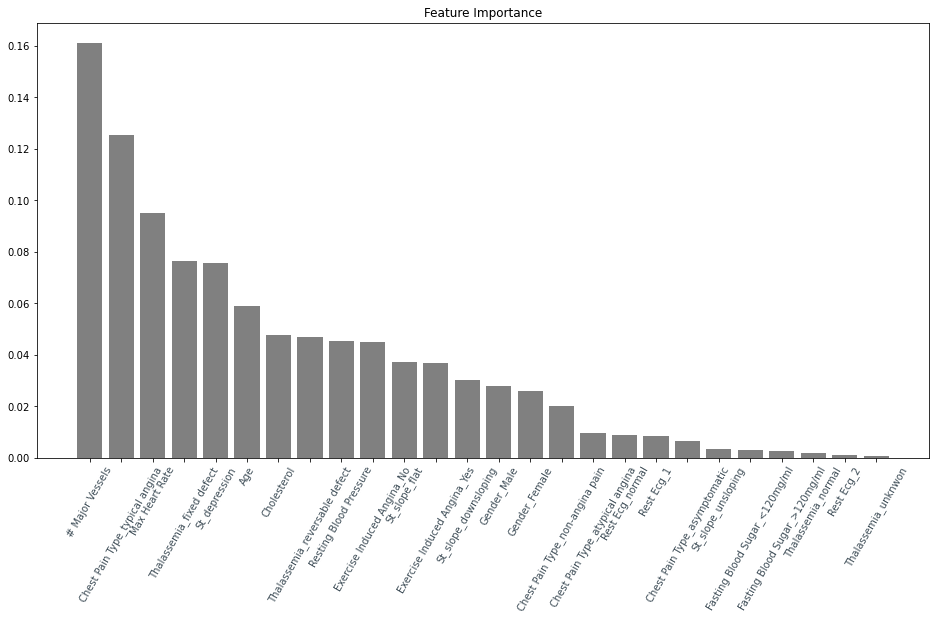

In [20]:
# plot feature weights
plt.figure(figsize=(16,8))
plt.title("Feature Importance")
plt.bar(range(len(feature_importances)),feature_importances[indices],color='gray')

# text labels
plt.xticks(range(len(feature_importances)),np.array(feature_names)[indices],color='#3e4d57',rotation=60)

plt.show()

### Model Evaluation

In [21]:
X_test.tail()

Age  Resting Blood Pressure  Cholesterol  Max Heart Rate  St_depression  \
277   57                     124          261             141            0.3   
121   59                     138          271             182            0.0   
187   54                     124          266             109            2.2   
301   57                     130          131             115            1.2   
283   40                     152          223             181            0.0   

     # Major Vessels  Gender_Female  Gender_Male  \
277                0              0            1   
121                0              0            1   
187                1              0            1   
301                1              0            1   
283                0              0            1   

     Chest Pain Type_asymptomatic  Chest Pain Type_atypical angina  ...  \
277                             0                                1  ...   
121                             0                                0  ...   
187                             0                                0  ...   
301                             0                                0  ...   
283                             0                                0  ...   

     Rest Ecg_normal  Exercise Induced Angina_No  Exercise Induced Angina_Yes  \
277                0                           1                            0   
121                1                           1                            0   
187                1                           0                            1   
301                0                           0                            1   
283                0                           1                            0   

     St_slope_downsloping  St_slope_flat  St_slope_unsloping  \
277                     1              0                   0   
121                     1              0                   0   
187                     0              1                   0   
301                     0              1                   0   
283                     1              0                   0   

     Thalassemia_fixed defect  Thalassemia_normal  \
277                         0                   0   
121                         1                   0   
187                         0                   0   
301                         0                   0   
283                         0                   0   

     Thalassemia_reversable defect  Thalassemia_unknwon  
277                              1                    0  
121                              0                    0  
187                              1                    0  
301                              1                    0  
283                              1                    0  

[5 rows x 26 columns]

In [22]:
X_test.iloc[6]

Age                                 57.0
Resting Blood Pressure             128.0
Cholesterol                        303.0
Max Heart Rate                     159.0
St_depression                        0.0
# Major Vessels                      1.0
Gender_Female                        1.0
Gender_Male                          0.0
Chest Pain Type_asymptomatic         0.0
Chest Pain Type_atypical angina      0.0
Chest Pain Type_non-angina pain      0.0
Chest Pain Type_typical angina       1.0
Fasting Blood Sugar_<120mg/ml        1.0
Fasting Blood Sugar_>120mg/ml        0.0
Rest Ecg_1                           0.0
Rest Ecg_2                           0.0
Rest Ecg_normal                      1.0
Exercise Induced Angina_No           1.0
Exercise Induced Angina_Yes          0.0
St_slope_downsloping                 1.0
St_slope_flat                        0.0
St_slope_unsloping                   0.0
Thalassemia_fixed defect             1.0
Thalassemia_normal                   0.0
Thalassemia_reve

In [23]:
testAdata = X_test.iloc[6]
testAdata.shape

(26,)

In [24]:
testAdata=np.array(testAdata).reshape(1,-1)
testAdata

array([[ 57., 128., 303., 159.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,
          1.,   1.,   0.,   0.,   0.,   1.,   1.,   0.,   1.,   0.,   0.,
          1.,   0.,   0.,   0.]])

In [25]:
testAdata.shape

(1, 26)

###### Prediction Results

In [26]:
# predict one
model.predict(testAdata)

array([1], dtype=int64)

In [27]:
model.predict_proba(testAdata)

array([[0.47061755, 0.52938245]])

In [28]:
# predict all
model.predict(X_test)

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [29]:
model.predict_proba(X_test)

array([[0.91843788, 0.08156212],
       [0.62132039, 0.37867961],
       [0.68066932, 0.31933068],
       [0.30029122, 0.69970878],
       [0.7260514 , 0.2739486 ],
       [0.22057161, 0.77942839],
       [0.47061755, 0.52938245],
       [0.32810888, 0.67189112],
       [0.10248536, 0.89751464],
       [0.86222676, 0.13777324],
       [0.09222278, 0.90777722],
       [0.79685809, 0.20314191],
       [0.42200799, 0.57799201],
       [0.14771042, 0.85228958],
       [0.86652668, 0.13347332],
       [0.16798607, 0.83201393],
       [0.88435085, 0.11564915],
       [0.99191759, 0.00808241],
       [0.32051909, 0.67948091],
       [0.77078869, 0.22921131],
       [0.90984554, 0.09015446],
       [0.18520819, 0.81479181],
       [0.32987702, 0.67012298],
       [0.126942  , 0.873058  ],
       [0.71103593, 0.28896407],
       [0.80626477, 0.19373523],
       [0.98815983, 0.01184017],
       [0.93593911, 0.06406089],
       [0.08700162, 0.91299838],
       [0.98662067, 0.01337933],
       [0.

In [30]:
model.predict_proba(X_test)[:,1]

array([0.08156212, 0.37867961, 0.31933068, 0.69970878, 0.2739486 ,
       0.77942839, 0.52938245, 0.67189112, 0.89751464, 0.13777324,
       0.90777722, 0.20314191, 0.57799201, 0.85228958, 0.13347332,
       0.83201393, 0.11564915, 0.00808241, 0.67948091, 0.22921131,
       0.09015446, 0.81479181, 0.67012298, 0.873058  , 0.28896407,
       0.19373523, 0.01184017, 0.06406089, 0.91299838, 0.01337933,
       0.86622652, 0.21828104, 0.12319855, 0.23116588, 0.00714853,
       0.12310068, 0.78266931, 0.52272767, 0.84719231, 0.1965757 ,
       0.04792422, 0.19418969, 0.85778336, 0.51809312, 0.91372021,
       0.47178545, 0.53209534, 0.8031504 , 0.78075796, 0.35396224,
       0.55092675, 0.80390513, 0.0586415 , 0.17962464, 0.95413901,
       0.74566131, 0.83412653, 0.75460511, 0.00707001, 0.04313811,
       0.66263965])

In [31]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

In [32]:
y_pred

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [33]:
Y_test

246    0
183    0
229    0
126    1
184    0
      ..
277    0
121    1
187    0
301    0
283    0
Name: Target, Length: 61, dtype: int64

###### confusion matrix

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
confusion_matrix?

In [36]:
confusion_matrix_model=confusion_matrix(Y_test,y_pred)

In [37]:
confusion_matrix_model

array([[26,  9],
       [ 4, 22]], dtype=int64)

In [38]:
import itertools
def cnf_matrix_plotter(cm,classes):
    '''draw confusion matrix
    '''
    plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Oranges)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    
    threshold=cm.max()/2.
    for i ,j, in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                 horizontalalignment="center",
                 color="white" if cm[i,j]>threshold else "black",
                 fontsize=25)
        
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show

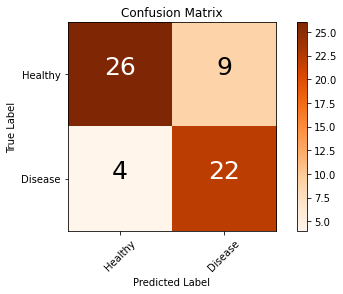

In [39]:
cnf_matrix_plotter(confusion_matrix_model,['Healthy','Disease'])

In [40]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred,target_names=['Healthy','Disease']))

              precision    recall  f1-score   support

     Healthy       0.87      0.74      0.80        35
     Disease       0.71      0.85      0.77        26

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61



#### ROC curve

In [41]:
model.predict_proba(X_test)

array([[0.91843788, 0.08156212],
       [0.62132039, 0.37867961],
       [0.68066932, 0.31933068],
       [0.30029122, 0.69970878],
       [0.7260514 , 0.2739486 ],
       [0.22057161, 0.77942839],
       [0.47061755, 0.52938245],
       [0.32810888, 0.67189112],
       [0.10248536, 0.89751464],
       [0.86222676, 0.13777324],
       [0.09222278, 0.90777722],
       [0.79685809, 0.20314191],
       [0.42200799, 0.57799201],
       [0.14771042, 0.85228958],
       [0.86652668, 0.13347332],
       [0.16798607, 0.83201393],
       [0.88435085, 0.11564915],
       [0.99191759, 0.00808241],
       [0.32051909, 0.67948091],
       [0.77078869, 0.22921131],
       [0.90984554, 0.09015446],
       [0.18520819, 0.81479181],
       [0.32987702, 0.67012298],
       [0.126942  , 0.873058  ],
       [0.71103593, 0.28896407],
       [0.80626477, 0.19373523],
       [0.98815983, 0.01184017],
       [0.93593911, 0.06406089],
       [0.08700162, 0.91299838],
       [0.98662067, 0.01337933],
       [0.

In [42]:
# probability of having disease
model.predict_proba(X_test)[:,1]

array([0.08156212, 0.37867961, 0.31933068, 0.69970878, 0.2739486 ,
       0.77942839, 0.52938245, 0.67189112, 0.89751464, 0.13777324,
       0.90777722, 0.20314191, 0.57799201, 0.85228958, 0.13347332,
       0.83201393, 0.11564915, 0.00808241, 0.67948091, 0.22921131,
       0.09015446, 0.81479181, 0.67012298, 0.873058  , 0.28896407,
       0.19373523, 0.01184017, 0.06406089, 0.91299838, 0.01337933,
       0.86622652, 0.21828104, 0.12319855, 0.23116588, 0.00714853,
       0.12310068, 0.78266931, 0.52272767, 0.84719231, 0.1965757 ,
       0.04792422, 0.19418969, 0.85778336, 0.51809312, 0.91372021,
       0.47178545, 0.53209534, 0.8031504 , 0.78075796, 0.35396224,
       0.55092675, 0.80390513, 0.0586415 , 0.17962464, 0.95413901,
       0.74566131, 0.83412653, 0.75460511, 0.00707001, 0.04313811,
       0.66263965])

In [43]:
y_pred_quant=model.predict_proba(X_test)[:,1]

In [44]:
from sklearn.metrics import roc_curve,auc

fpr,tpr,thresholds = roc_curve(Y_test,y_pred_quant)

In [45]:
fpr

array([0.        , 0.        , 0.        , 0.02857143, 0.02857143,
       0.2       , 0.2       , 0.31428571, 0.31428571, 0.4       ,
       0.4       , 0.42857143, 0.42857143, 0.71428571, 0.71428571,
       1.        ])

In [46]:
tpr

array([0.        , 0.03846154, 0.38461538, 0.38461538, 0.80769231,
       0.80769231, 0.84615385, 0.84615385, 0.88461538, 0.88461538,
       0.92307692, 0.92307692, 0.96153846, 0.96153846, 1.        ,
       1.        ])

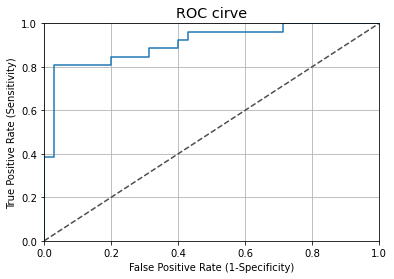

In [47]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],ls="--",c=".3")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.rcParams['font.size']=12
plt.title('ROC cirve')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [48]:
auc(fpr,tpr)

0.9087912087912088

### Permutation Importance

In [49]:
# -reorder a feature to see influence on mdoel results
# If model performance is significantly worse, then that feature is importance
import eli5
from eli5.sklearn import PermutationImportance

perm=PermutationImportance(model,random_state=1).fit(X_test,Y_test)
eli5.show_weights(perm,feature_names=X_test.columns.tolist())

#### Interpretability Analysis

In [50]:
base_features = df.columns.values.tolist()
base_features.remove('Target')
base_features

['Age',
 'Resting Blood Pressure',
 'Cholesterol',
 'Max Heart Rate',
 'St_depression',
 '# Major Vessels',
 'Gender_Female',
 'Gender_Male',
 'Chest Pain Type_asymptomatic',
 'Chest Pain Type_atypical angina',
 'Chest Pain Type_non-angina pain',
 'Chest Pain Type_typical angina',
 'Fasting Blood Sugar_<120mg/ml',
 'Fasting Blood Sugar_>120mg/ml',
 'Rest Ecg_1',
 'Rest Ecg_2',
 'Rest Ecg_normal',
 'Exercise Induced Angina_No',
 'Exercise Induced Angina_Yes',
 'St_slope_downsloping',
 'St_slope_flat',
 'St_slope_unsloping',
 'Thalassemia_fixed defect',
 'Thalassemia_normal',
 'Thalassemia_reversable defect',
 'Thalassemia_unknwon']

In [51]:
from pdpbox import info_plots, get_dataset, pdp, get_dataset, info_plots

#### PDP (Partial Dependence Plot)

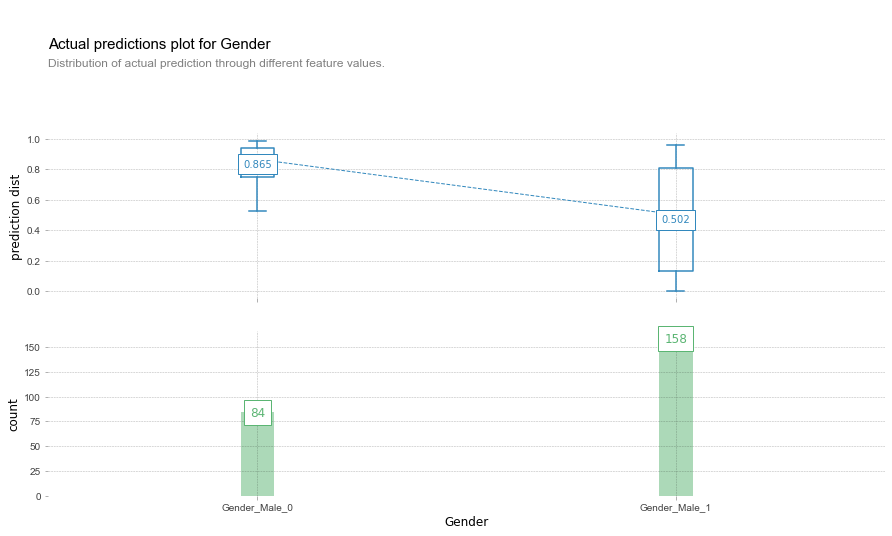

In [52]:
# 反映某一特征在不同值变化时对模型预测结果的影响
# 注意对比PDP图和先验数据集不同类别分布的差异

# Gender
# 实际预测 可用于判断因果
fig,axes,summary_df = info_plots.actual_plot(
    model=model, X=X_train, feature='Gender_Male',feature_name='Gender',predict_kwds={}
)

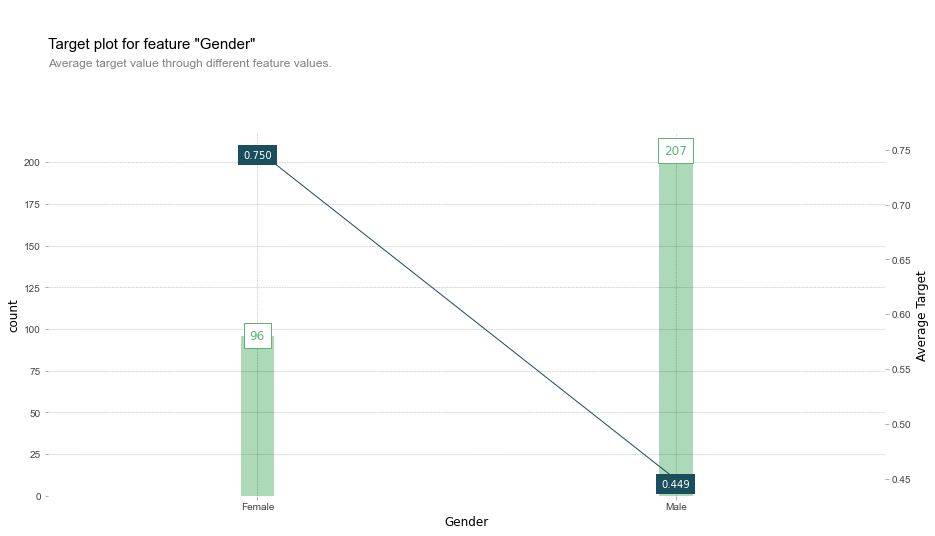

In [53]:
# Gender
# 先验分布不能断定因果
fig,axes,summary_df = info_plots.target_plot(
    df=df, feature='Gender_Male',feature_name='Gender',target=['Target']
)
_ = axes['bar_ax'].set_xticklabels(['Female','Male'])

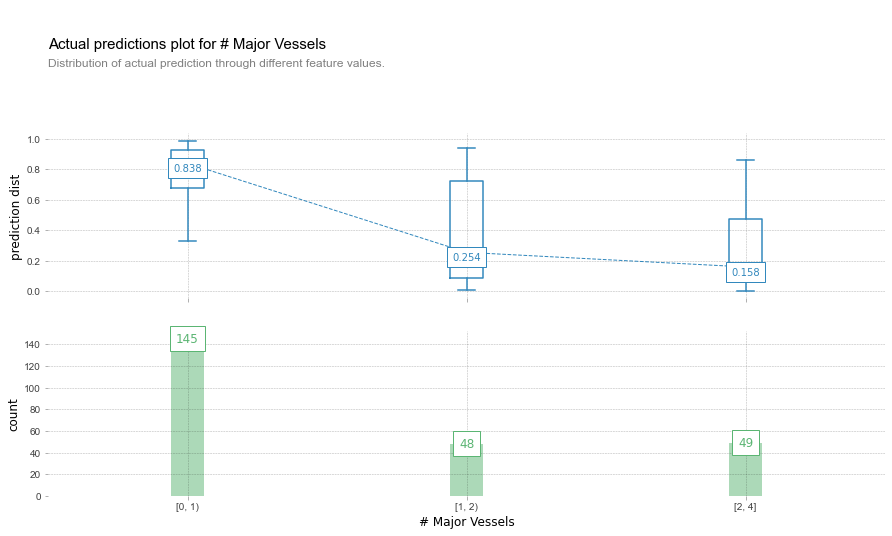

In [54]:
# Number of Major Vessel
fig,axes,summary_df = info_plots.actual_plot(
model=model,X=X_train,feature='# Major Vessels',feature_name='# Major Vessels',predict_kwds={})

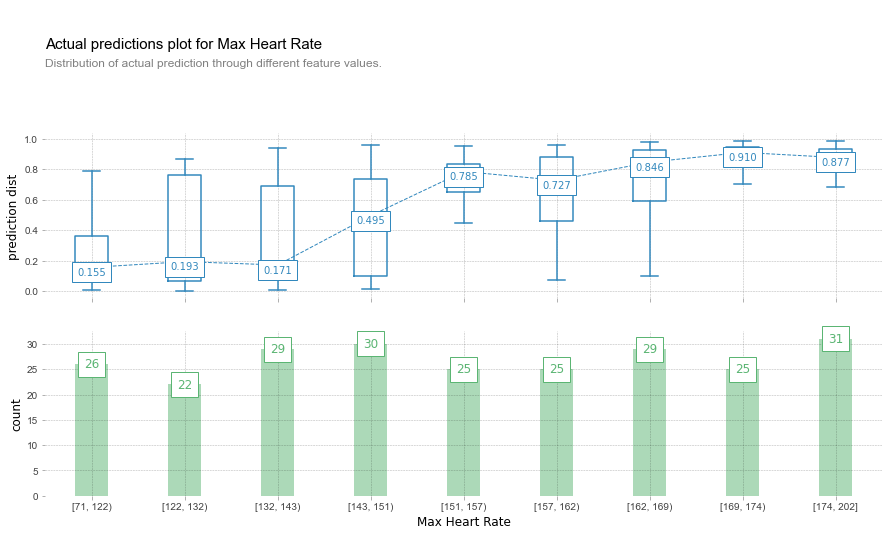

In [55]:
# Max Heart Rate
fig,axes,summary_df = info_plots.actual_plot(
model=model,X=X_train,feature='Max Heart Rate',feature_name='Max Heart Rate',predict_kwds={})

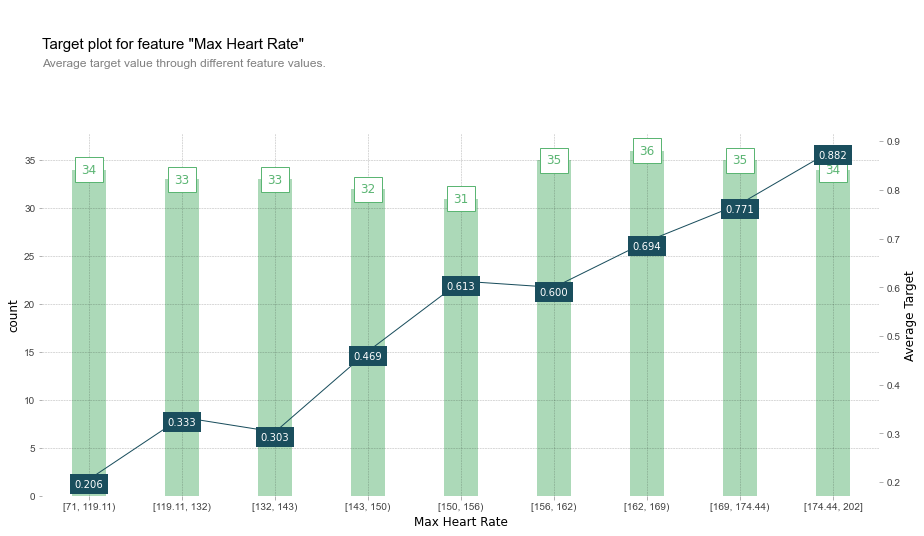

In [56]:
# Max Heart Rate
fig,axes,summary_df = info_plots.target_plot(
df=df,feature='Max Heart Rate',feature_name='Max Heart Rate',target=['Target'])

###### ICE

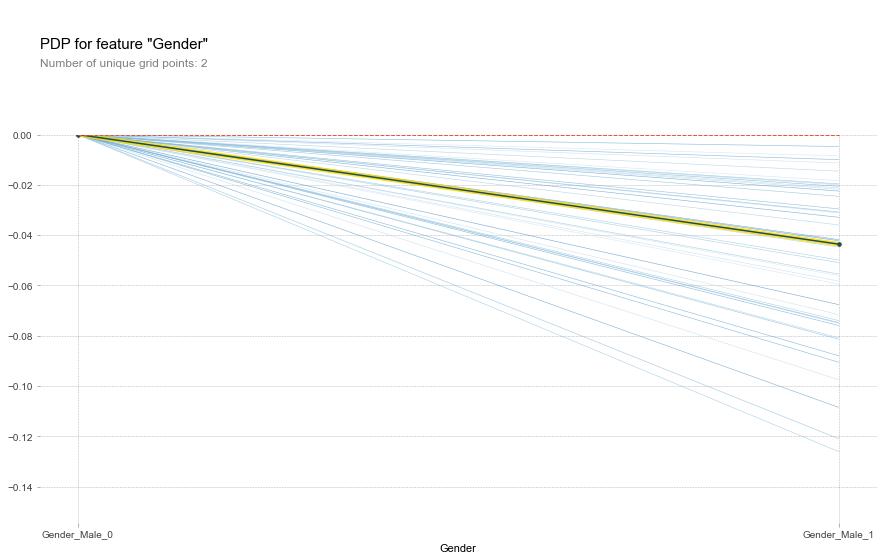

In [57]:
# 将测试集每一个样本的PDP图单独显示出来，即是ICE图
feat_name='Gender_Male'
nick_name='Gender'
pdp_dist=pdp.pdp_isolate(
    model=model,dataset=X_test,model_features=base_features,feature=feat_name
)

# more info
fig,axes = pdp.pdp_plot(pdp_dist,nick_name,plot_lines=True,frac_to_plot=0.8)#,plot_pts_dist=True)

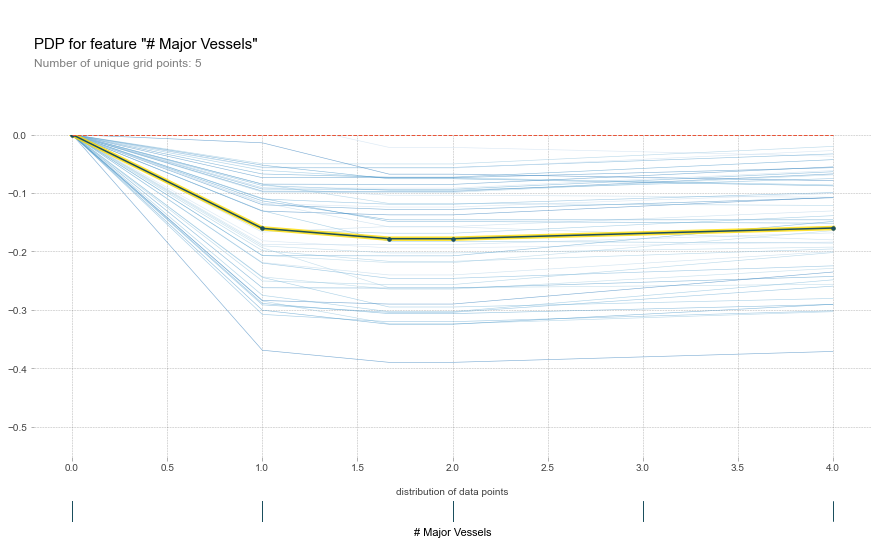

In [58]:
feat_name='# Major Vessels'
nick_name='# Major Vessels'
pdp_dist=pdp.pdp_isolate(
    model=model,dataset=X_test,model_features=base_features,feature=feat_name
)

# more info
fig,axes = pdp.pdp_plot(pdp_dist,nick_name,plot_lines=True,frac_to_plot=0.8,plot_pts_dist=True)

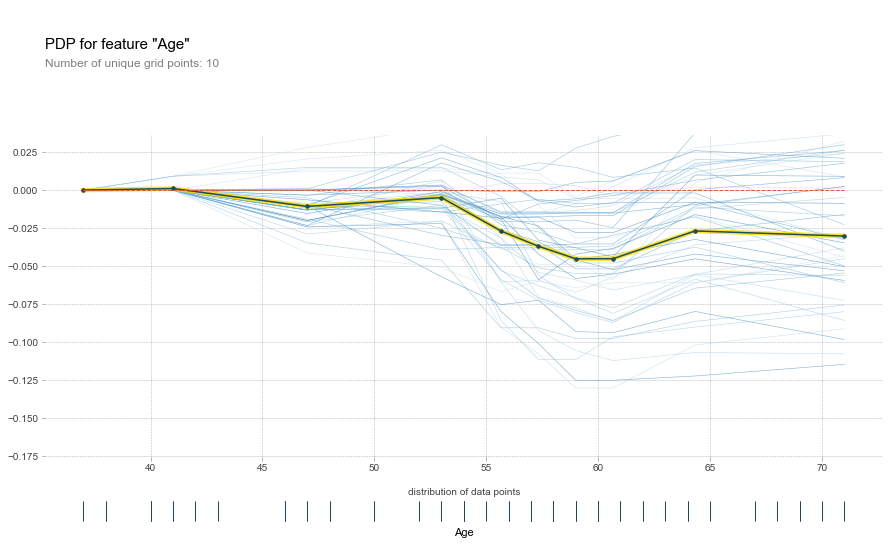

In [59]:
feat_name='Age'
nick_name='Age'
pdp_dist=pdp.pdp_isolate(
    model=model,dataset=X_test,model_features=base_features,feature=feat_name
)

# more info
fig,axes = pdp.pdp_plot(pdp_dist,nick_name,plot_lines=True,frac_to_plot=0.8,plot_pts_dist=True)

In [60]:
# fig,axes = pdp.pdp_plot(
#     pdp_dist,nick_name,plot_lines=True,frac_to_plot=0.5,x_quantile=True,show_percentile=True,plot_pts_dist=True)

###### Influence of Max Heart Rate

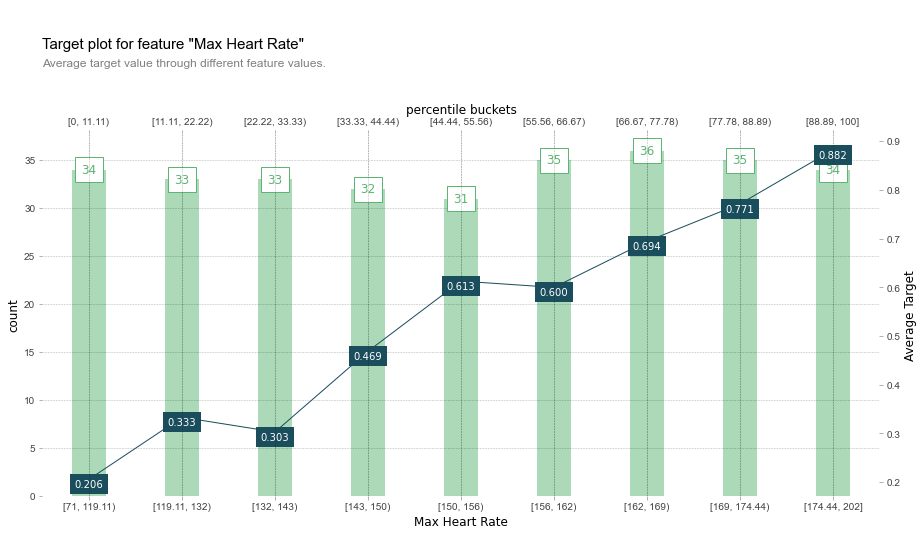

In [61]:
feat_name = 'Max Heart Rate'
nick_name = 'Max Heart Rate'
fig,axes,summary_df = info_plots.target_plot(
df=df,feature=feat_name,feature_name=nick_name,target='Target',show_percentile=True)

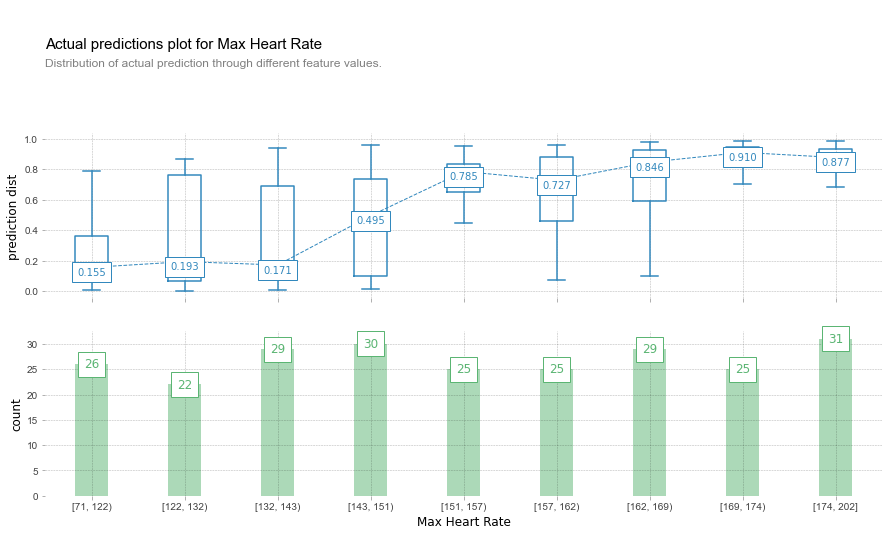

In [62]:
fig,axes,summary_df = info_plots.actual_plot(
model=model,X=X_train, feature='Max Heart Rate',feature_name='Max Heart Rate',predict_kwds={})

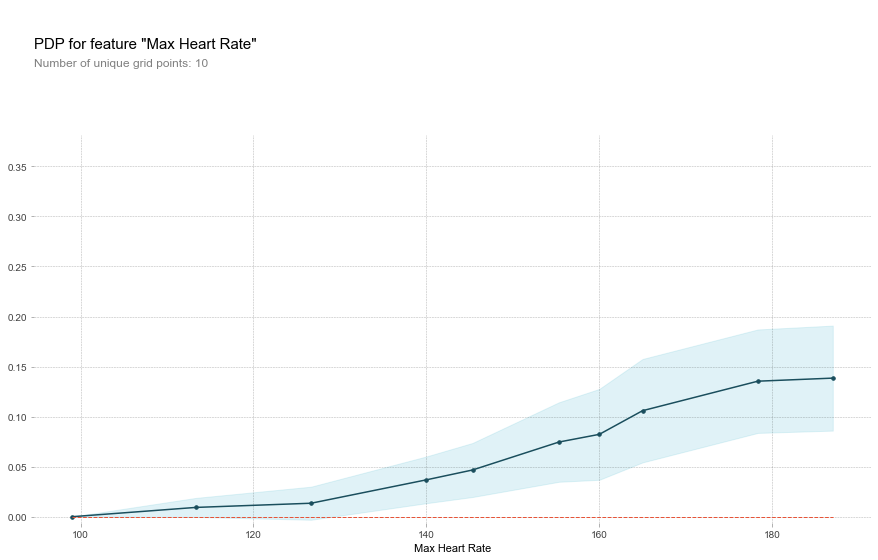

In [63]:
pdp_dist = pdp.pdp_isolate(model=model,dataset=X_test,model_features=base_features,
                          feature='Max Heart Rate')
fig,axes = pdp.pdp_plot(pdp_dist,'Max Heart Rate')

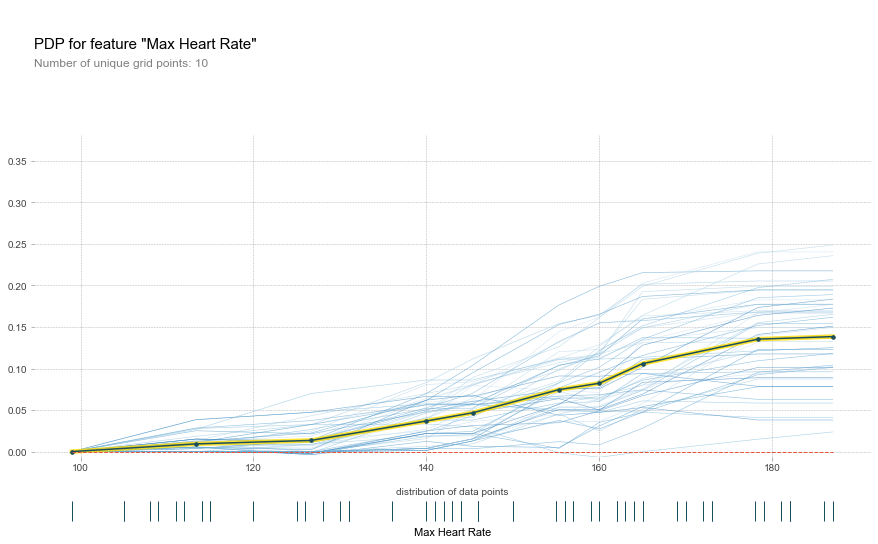

In [64]:
feat_name='Max Heart Rate'
nick_name='Max Heart Rate'
pdp_dist = pdp.pdp_isolate(
model=model,dataset=X_test,model_features=base_features,feature=feat_name)
fig,axes=pdp.pdp_plot(pdp_dist,nick_name,plot_lines=True,frac_to_plot=0.8,plot_pts_dist=True)

###### Influence of Thalassemia

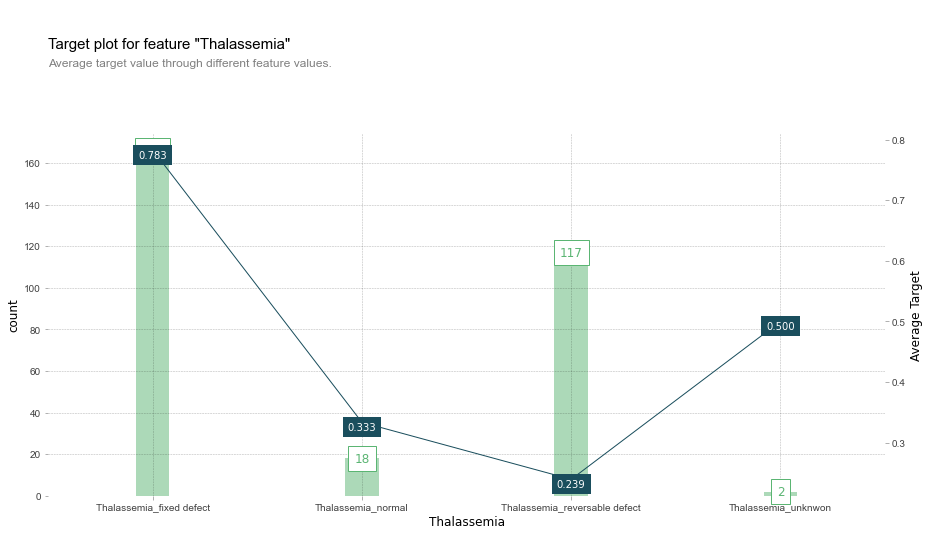

In [65]:
fig,axes,summary_df = info_plots.target_plot(
df=df,feature=[ 'Thalassemia_fixed defect','Thalassemia_normal','Thalassemia_reversable defect','Thalassemia_unknwon'],
    feature_name='Thalassemia',target='Target',show_percentile=True)

In [66]:
summary_df

x                 display_column  count    Target
0  0       Thalassemia_fixed defect    166  0.783133
1  1             Thalassemia_normal     18  0.333333
2  2  Thalassemia_reversable defect    117  0.239316
3  3            Thalassemia_unknwon      2  0.500000

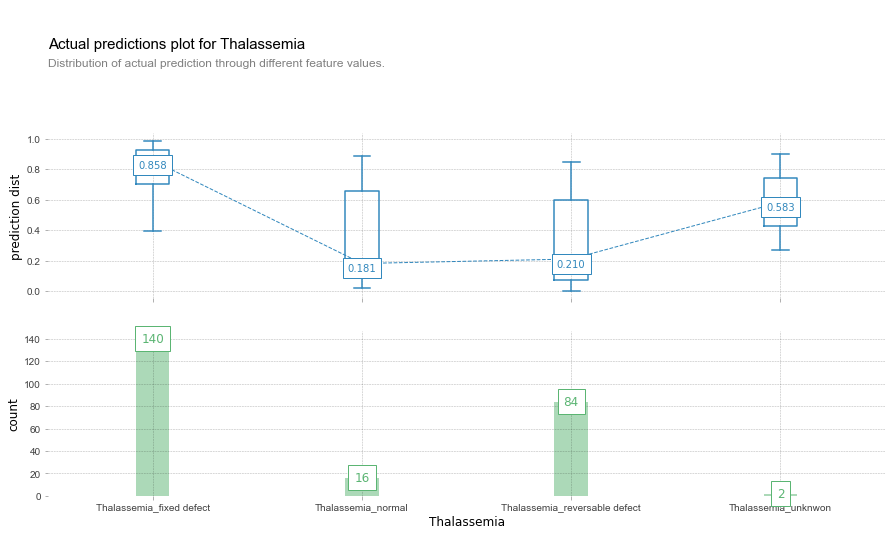

In [67]:
fig,axes,summary_df = info_plots.actual_plot(
model=model,X=X_train, feature=[ 'Thalassemia_fixed defect','Thalassemia_normal','Thalassemia_reversable defect','Thalassemia_unknwon'],feature_name='Thalassemia',predict_kwds={})

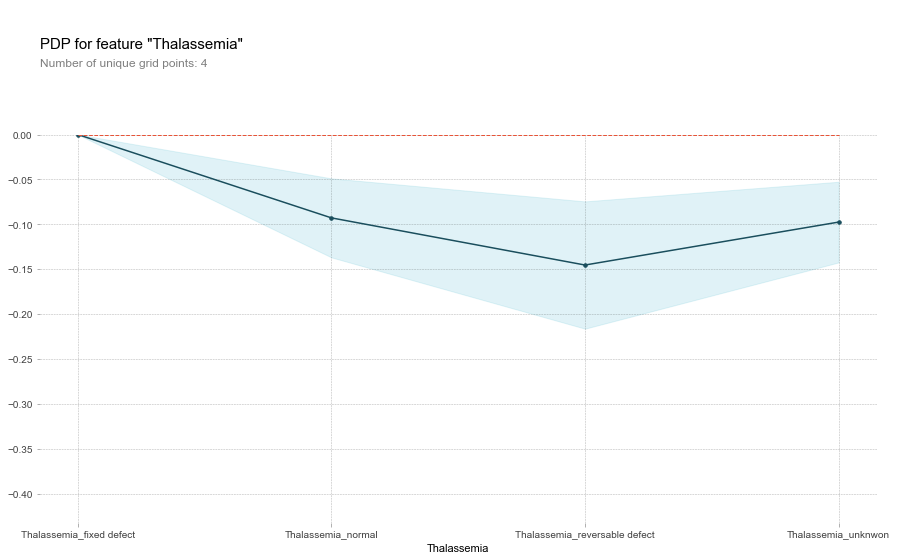

In [68]:
pdp_dist = pdp.pdp_isolate(model=model,dataset=X_test,model_features=base_features,
                          feature=[ 'Thalassemia_fixed defect','Thalassemia_normal','Thalassemia_reversable defect','Thalassemia_unknwon'])
fig,axes = pdp.pdp_plot(pdp_dist,'Thalassemia')

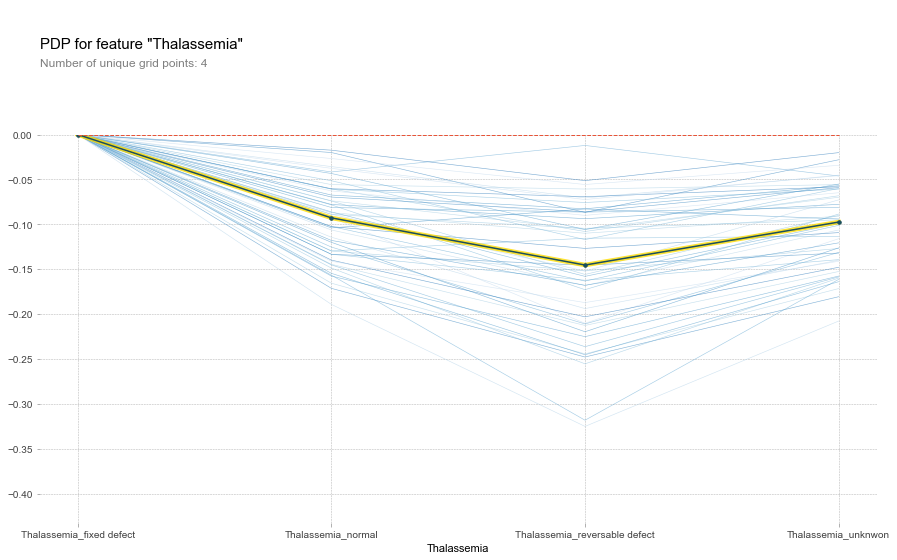

In [69]:
fig,axes=pdp.pdp_plot(pdp_dist,'Thalassemia',center=True,plot_lines=True,frac_to_plot=0.8)#,plot_pts_dist=True)

###### PDP for all features

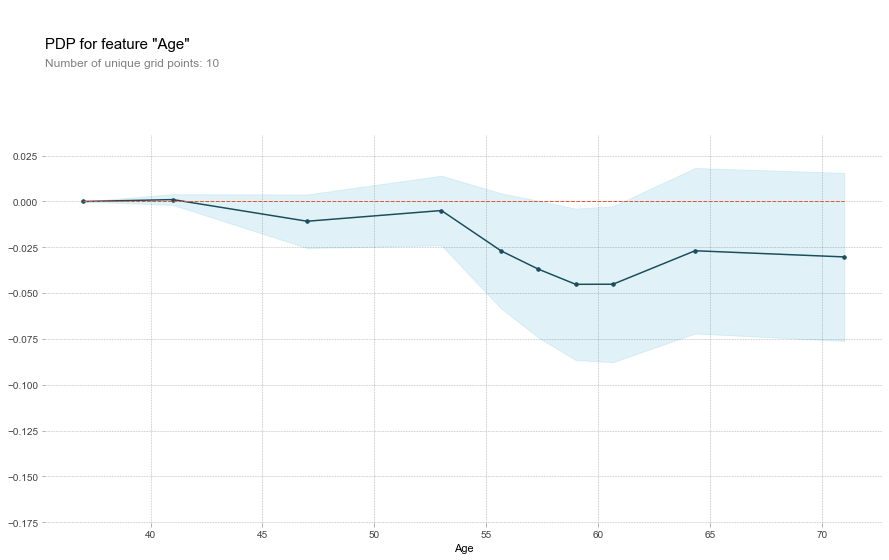

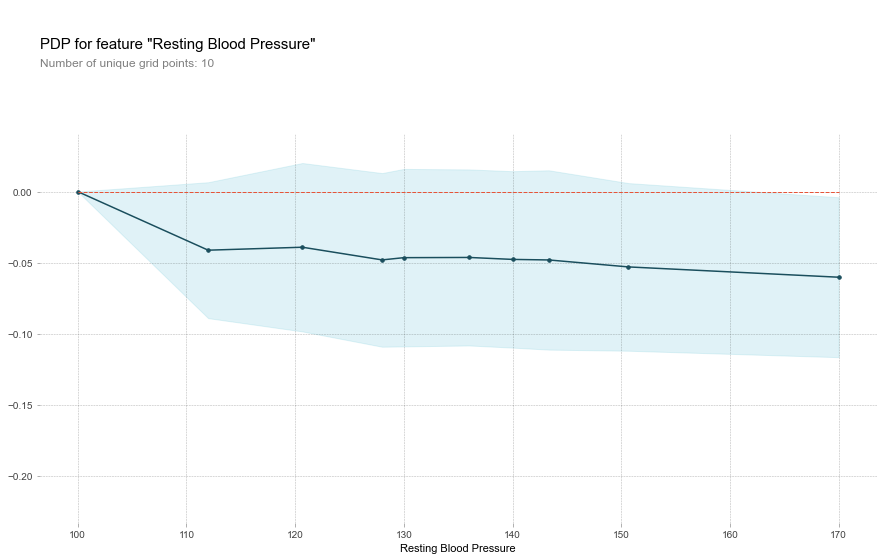

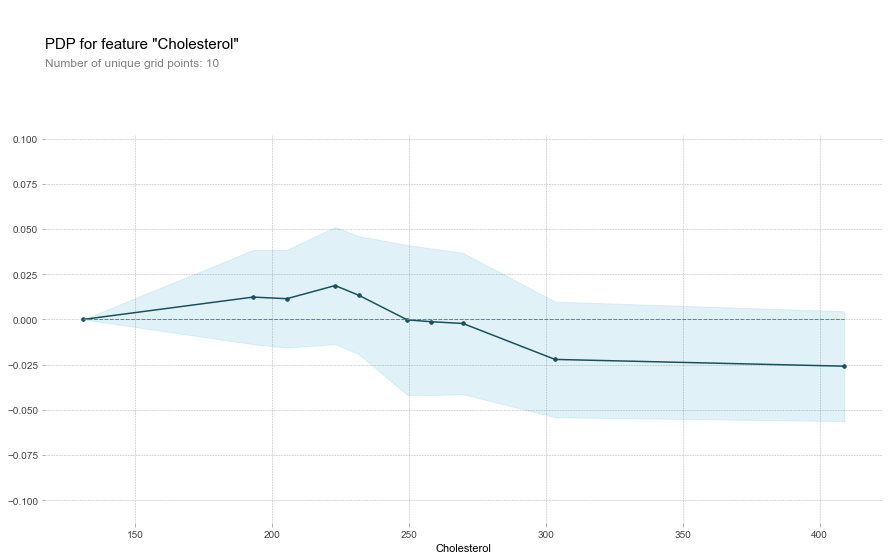

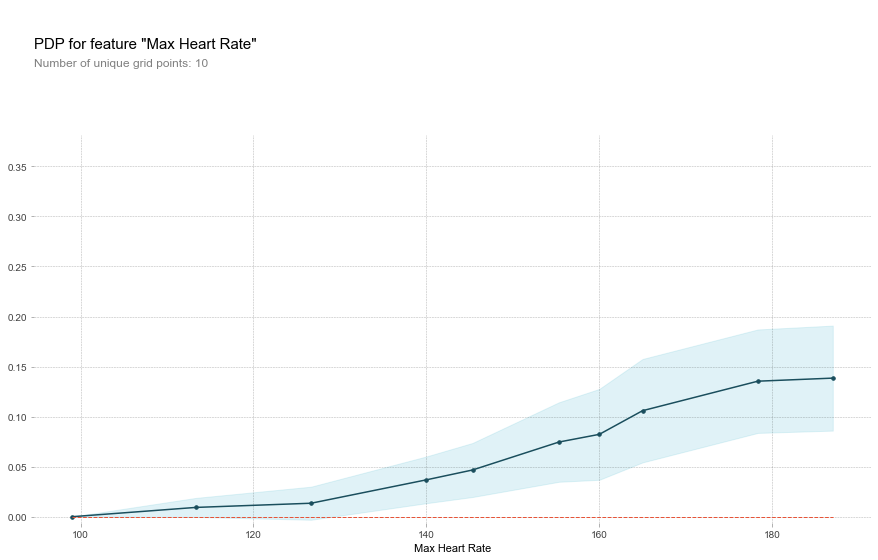

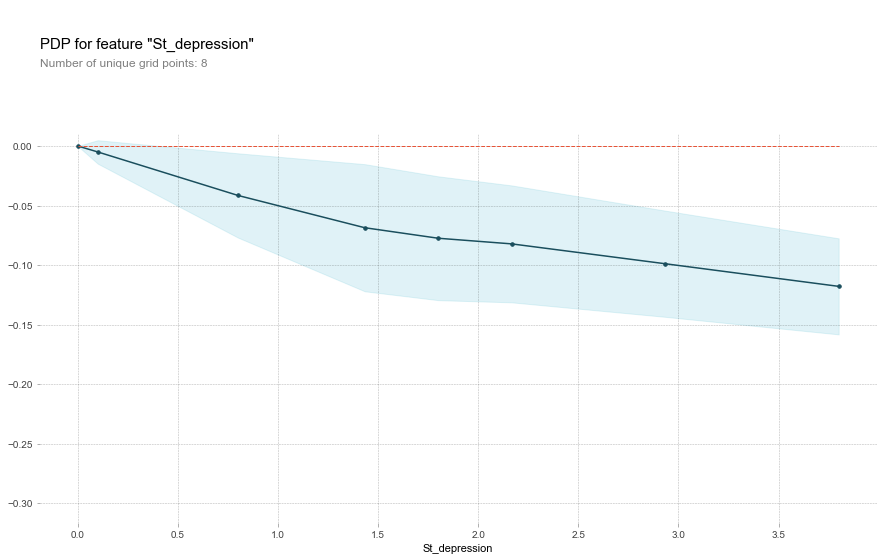

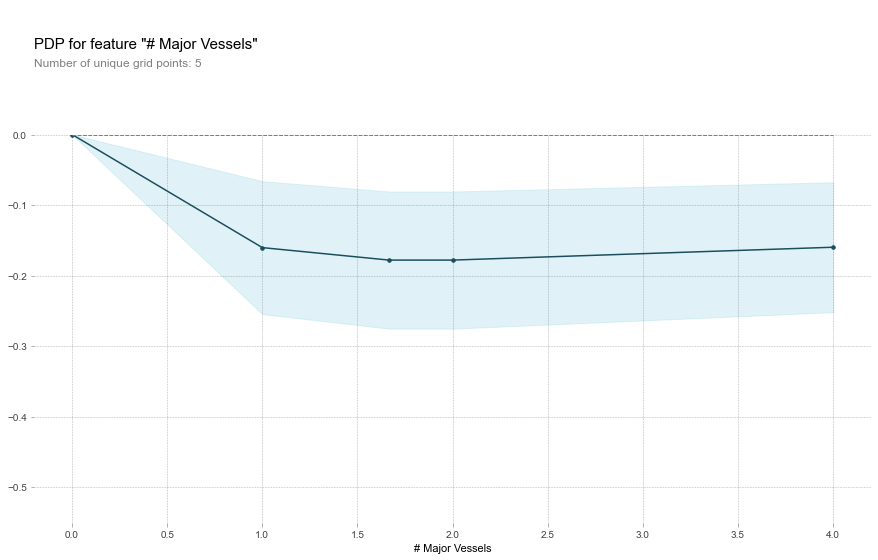

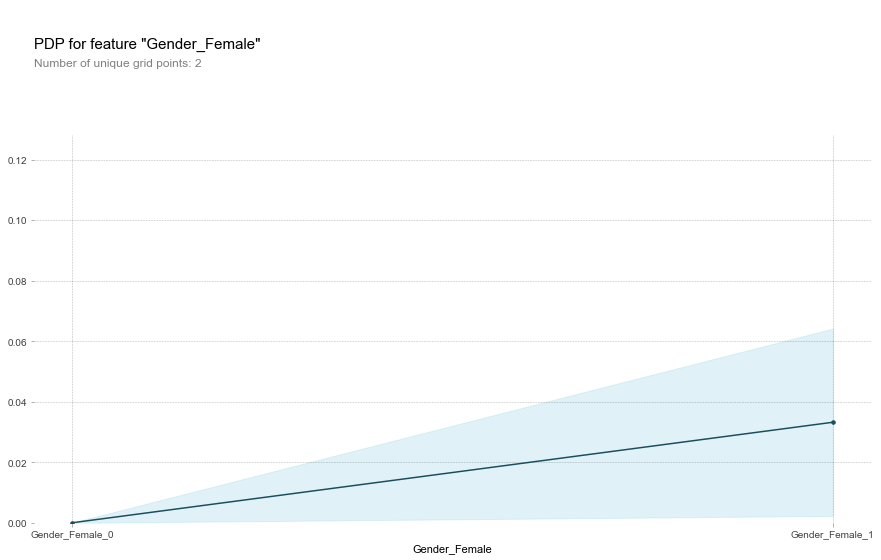

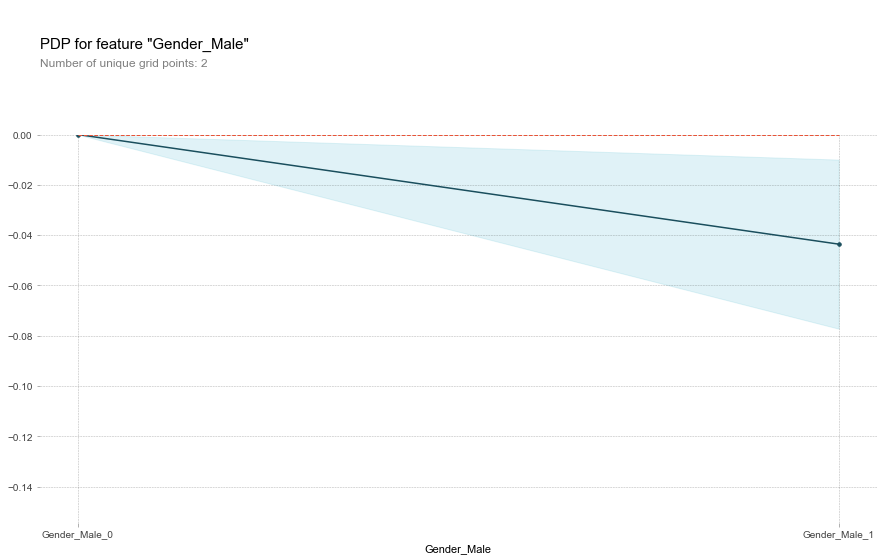

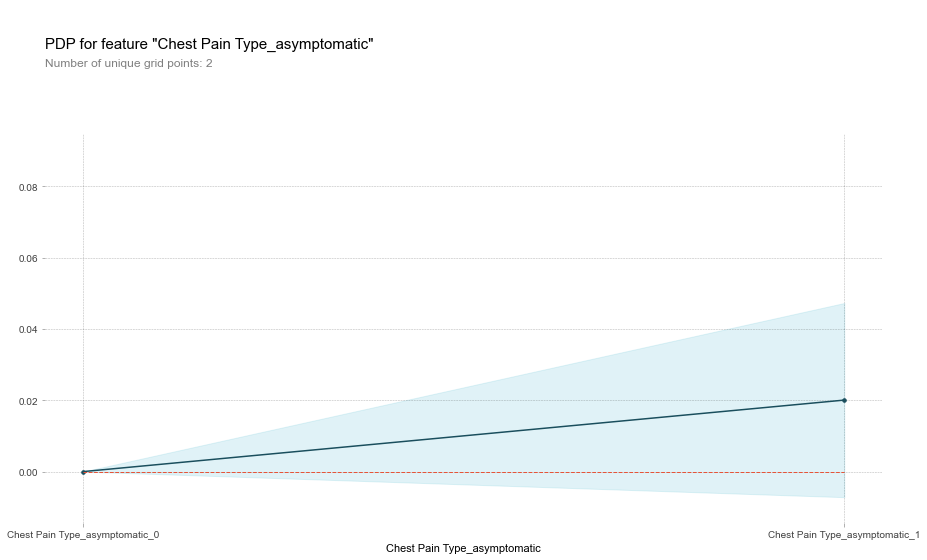

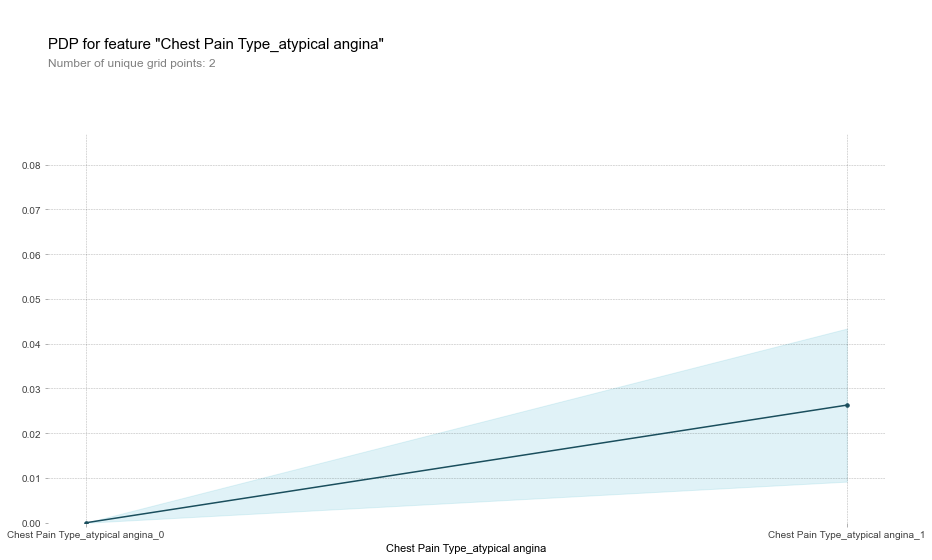

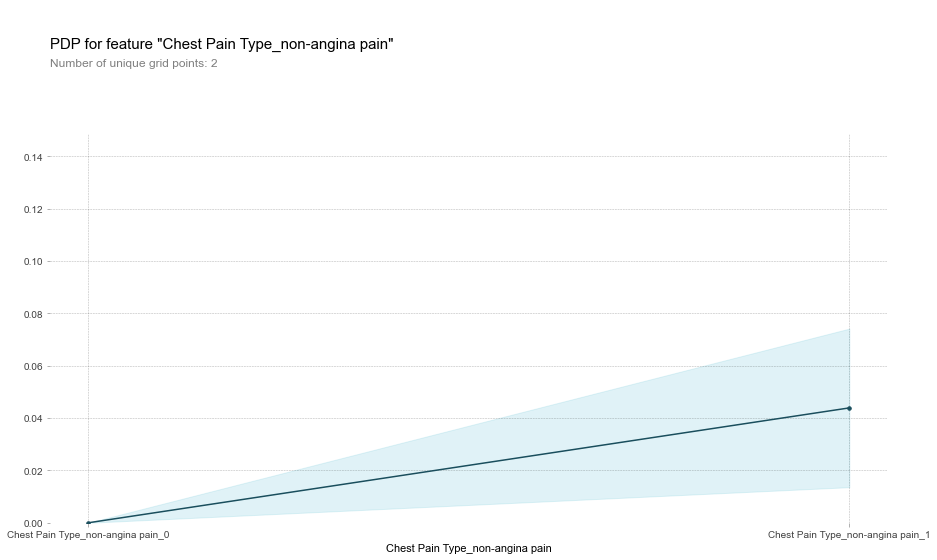

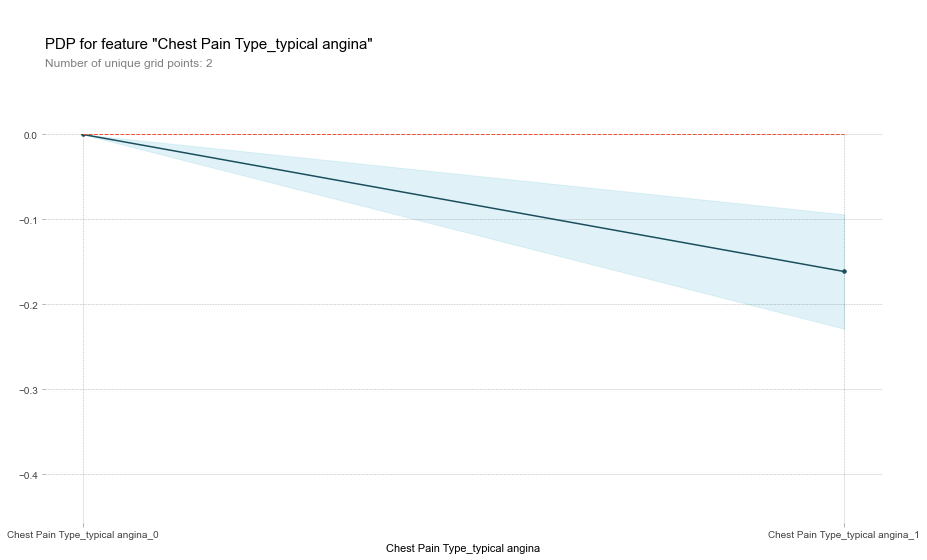

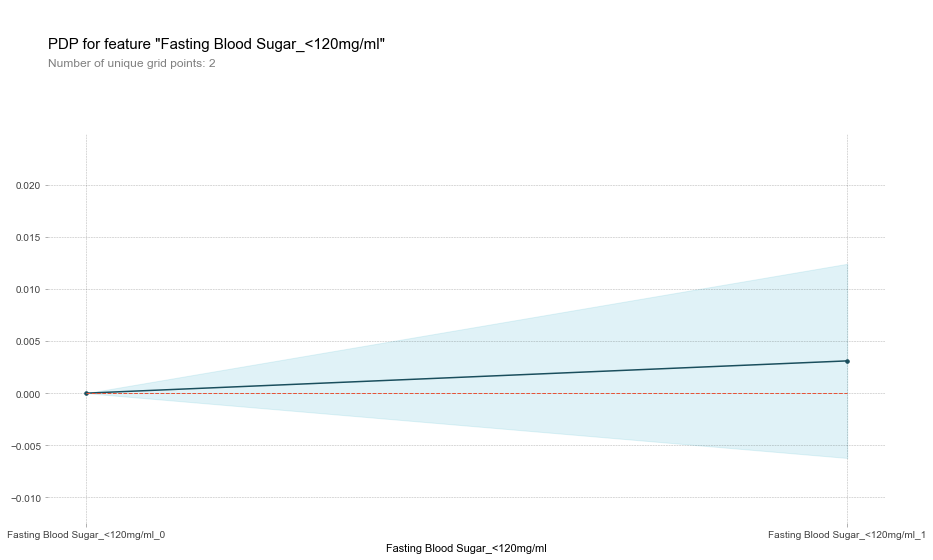

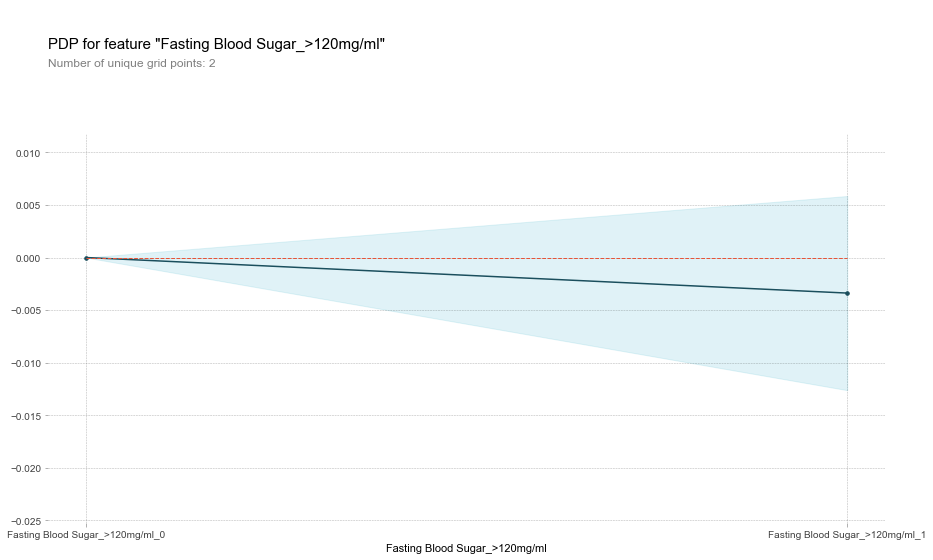

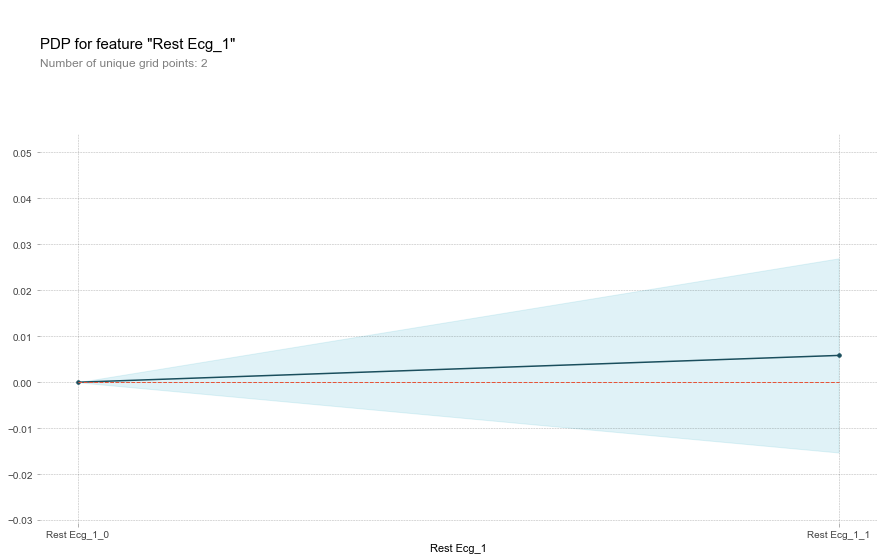

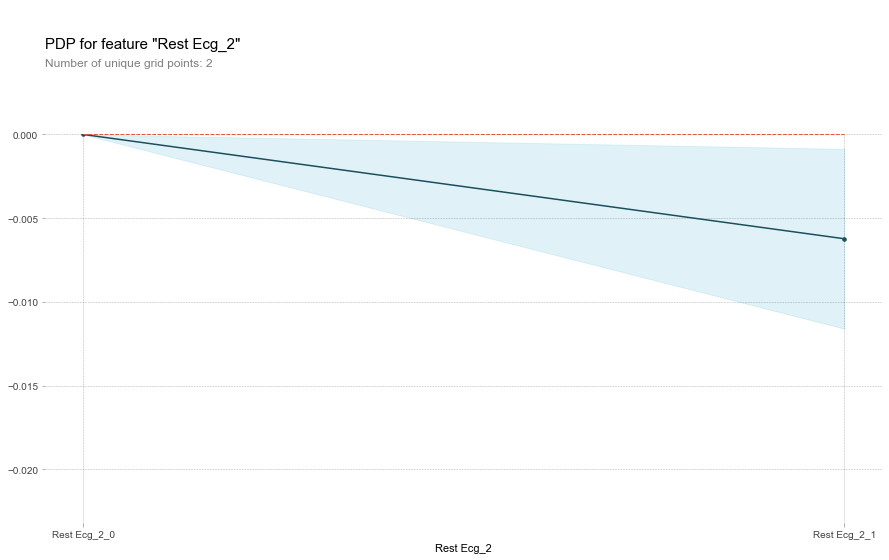

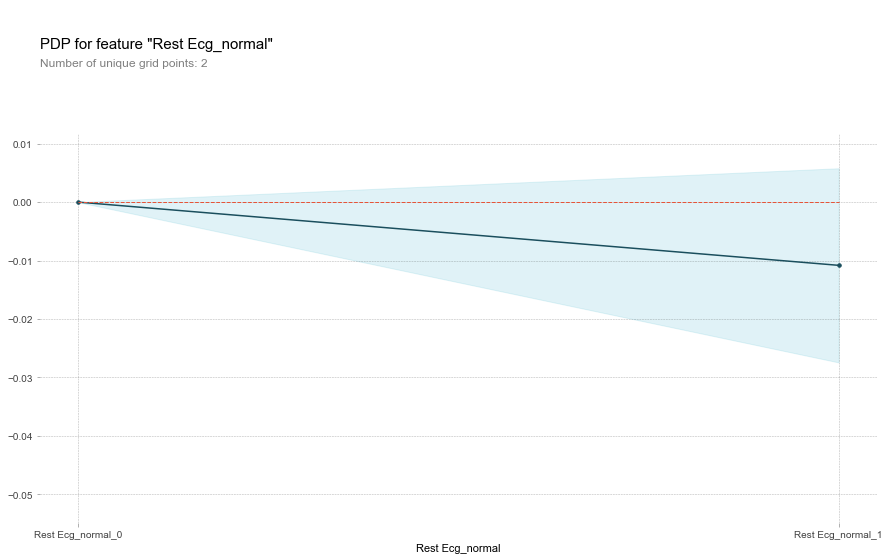

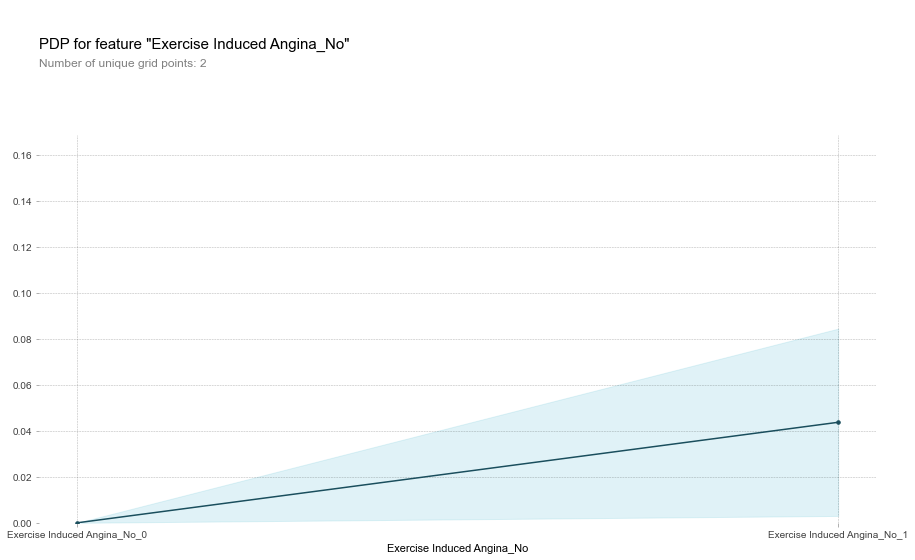

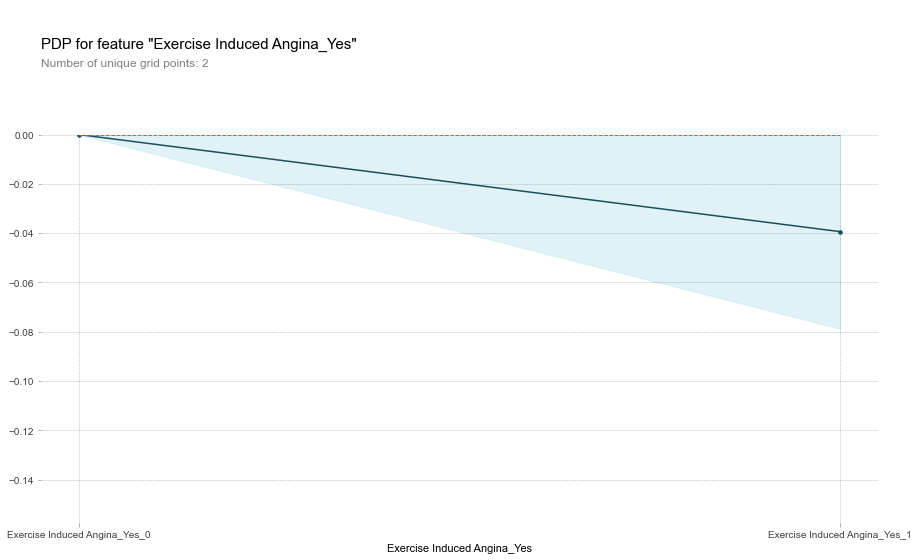

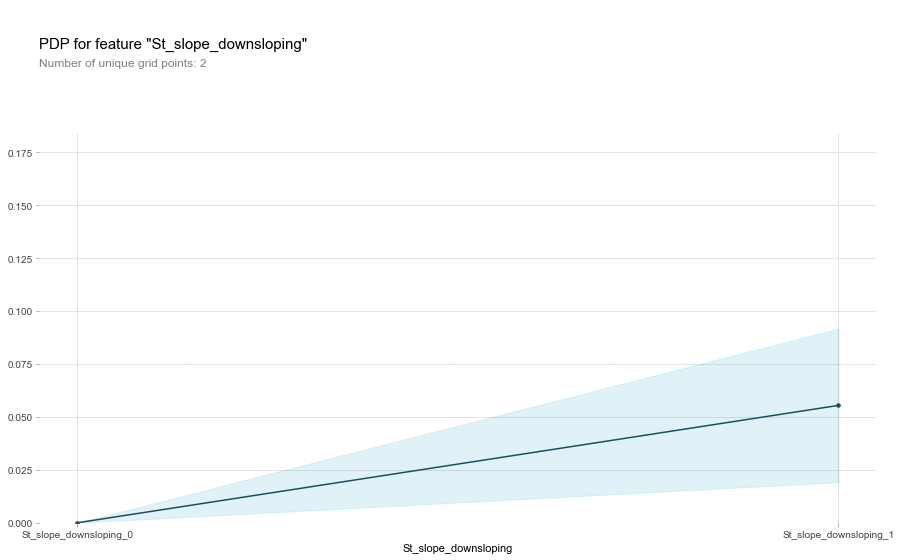

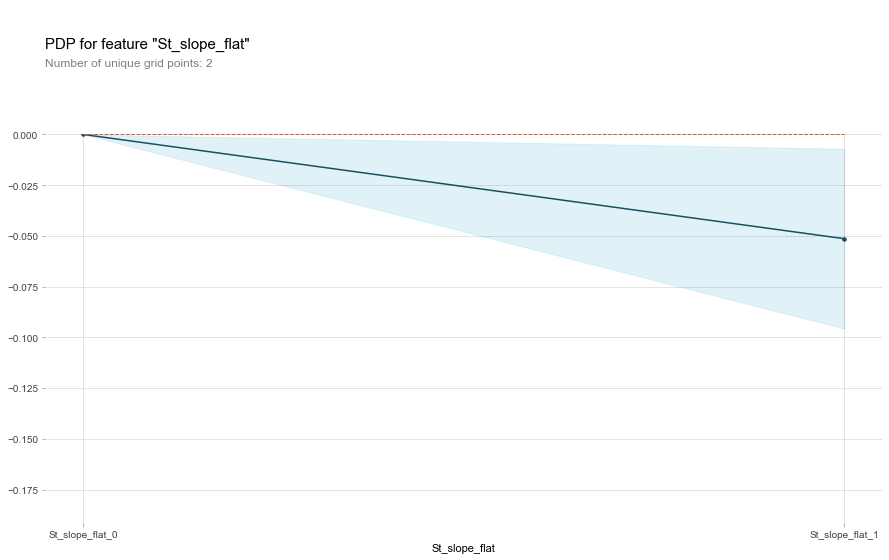

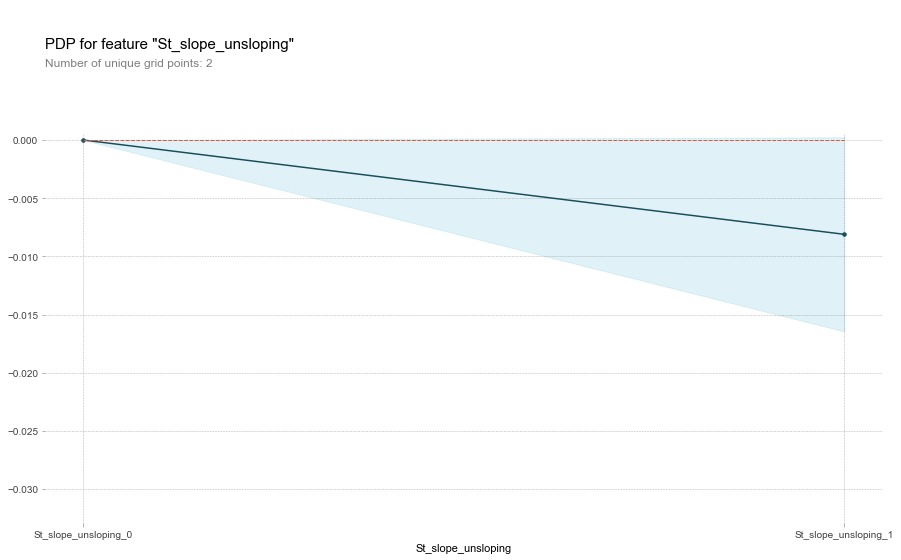

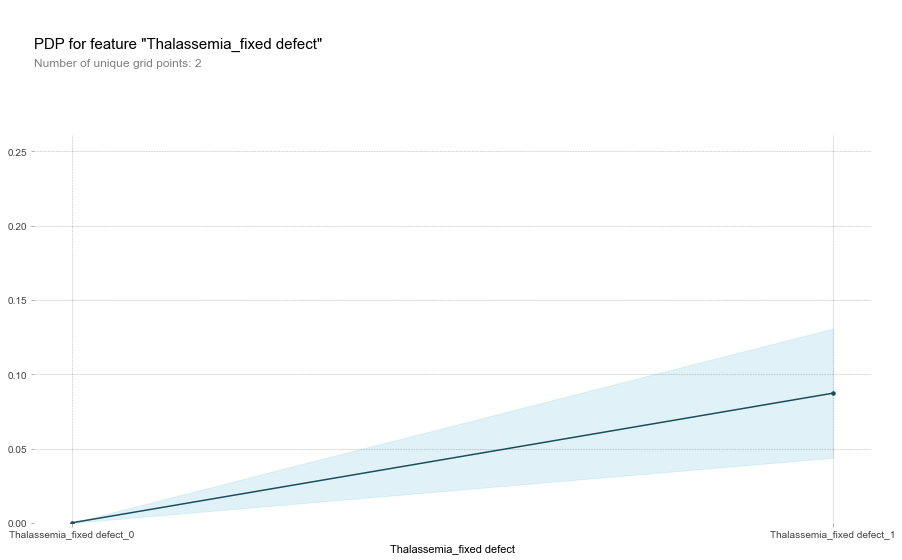

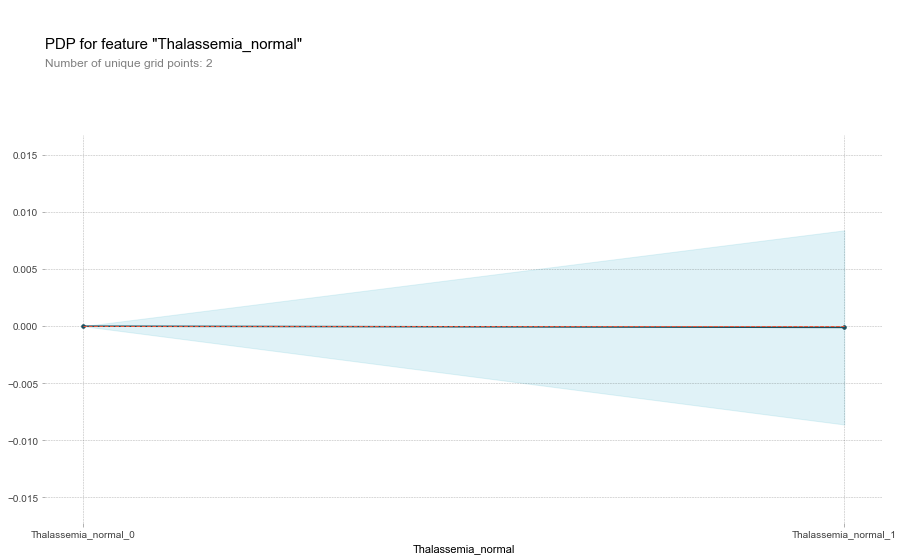

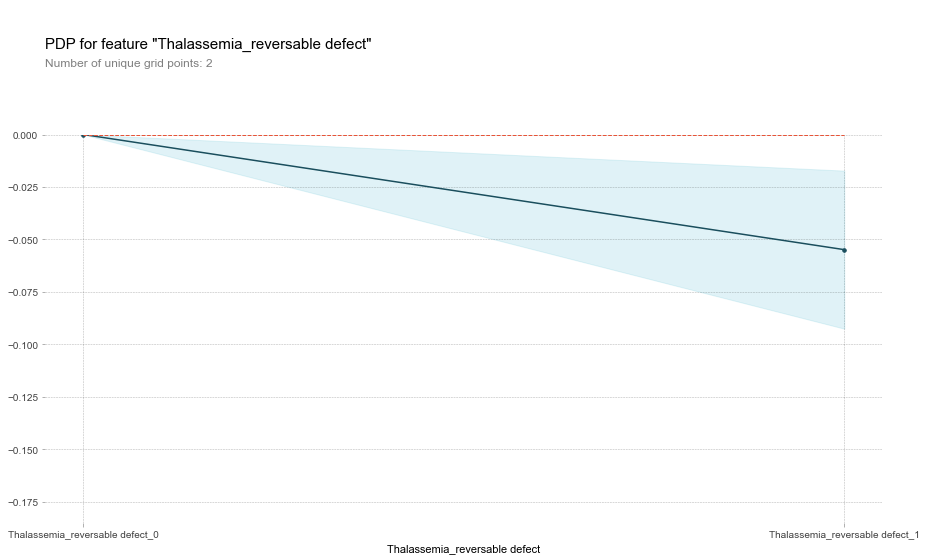

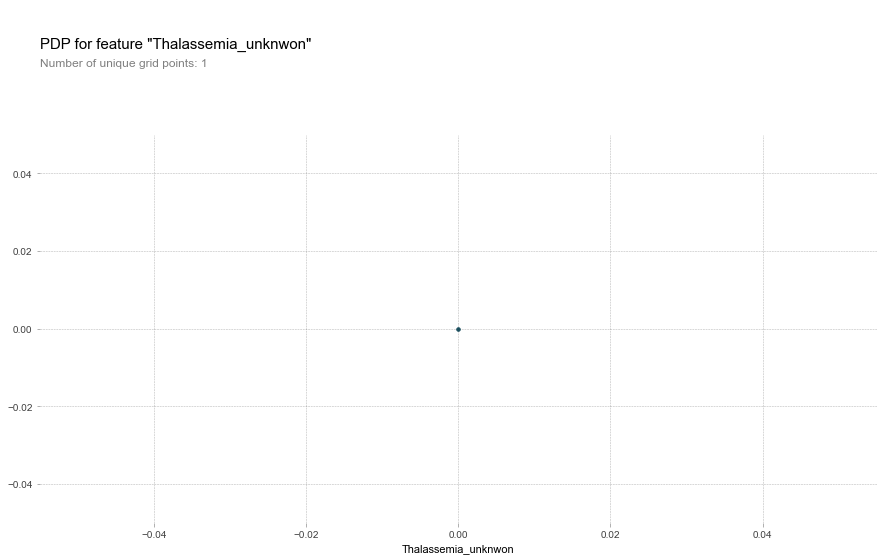

In [70]:
for i in base_features:
    feat_name=i
    pdp_dist=pdp.pdp_isolate(model=model,dataset=X_test,model_features=base_features,feature=feat_name)
    pdp.pdp_plot(pdp_dist,feat_name)
    plt.show()

###### 2D-PDP

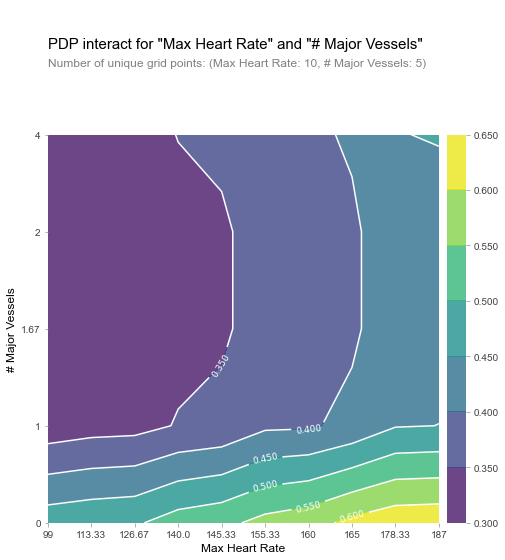

In [74]:
feat_name1 = 'Max Heart Rate'
nick_name1 = 'Max Heart Rate'
feat_name2 = '# Major Vessels'
nick_name2 = '# Major Vessels'

inter = pdp.pdp_interact(
model=model,dataset=X_test,model_features=base_features,features=[feat_name1,feat_name2])

fig,axes = pdp.pdp_interact_plot(
pdp_interact_out=inter,feature_names=[nick_name1,nick_name2],plot_type='contour',x_quantile=True)#,plot_pts_dist=True)


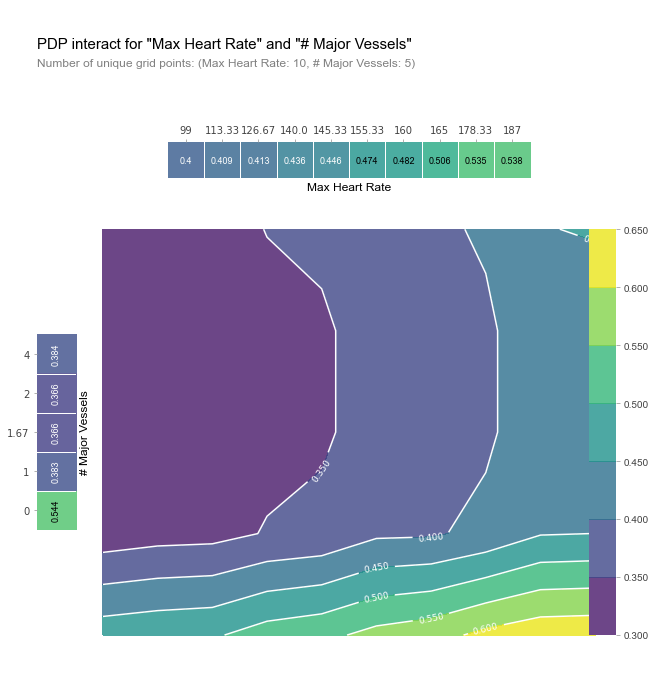

In [75]:
# axis 均匀分割
fig,axes= pdp.pdp_interact_plot(inter,[nick_name1,nick_name2]
                                ,plot_type='contour',x_quantile=False,plot_pdp=True)

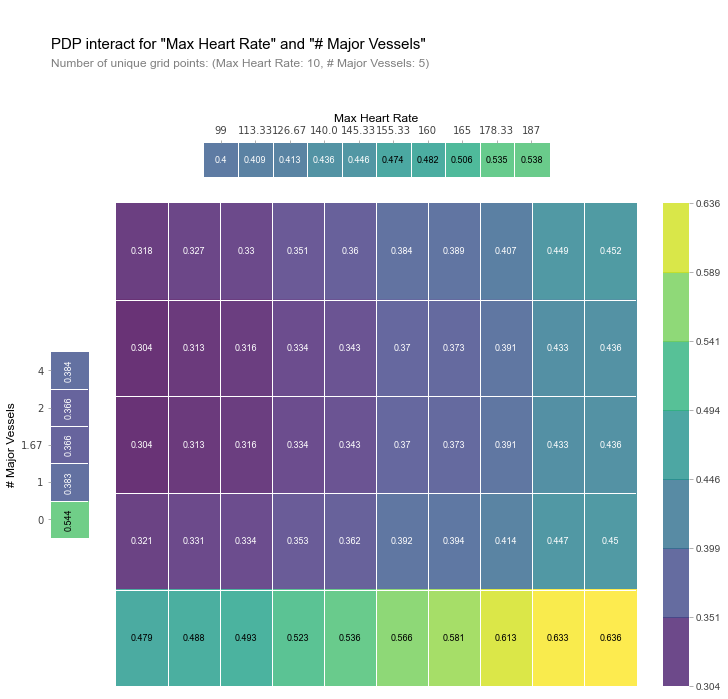

In [76]:
fig,axes= pdp.pdp_interact_plot(inter,[nick_name1,nick_name2]
                                ,plot_type='grid',x_quantile=True,plot_pdp=True)

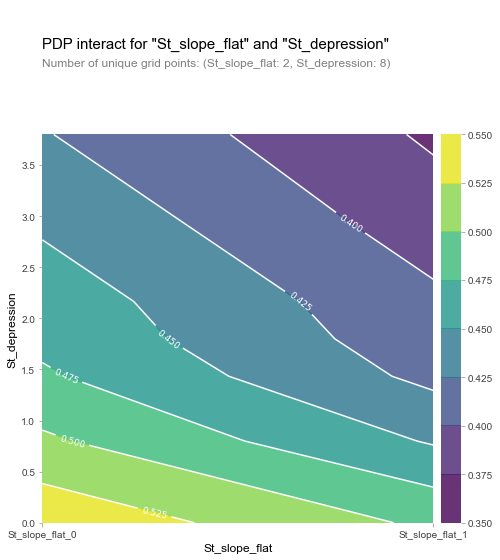

In [77]:
feat_name1 = 'St_slope_flat'
nick_name1 = 'St_slope_flat'
feat_name2 = 'St_depression'
nick_name2 = 'St_depression'

inter = pdp.pdp_interact(
model=model,dataset=X_test,model_features=base_features,features=[feat_name1,feat_name2])

pdp.pdp_interact_plot(
pdp_interact_out=inter,feature_names=[nick_name1,nick_name2])
plt.show()

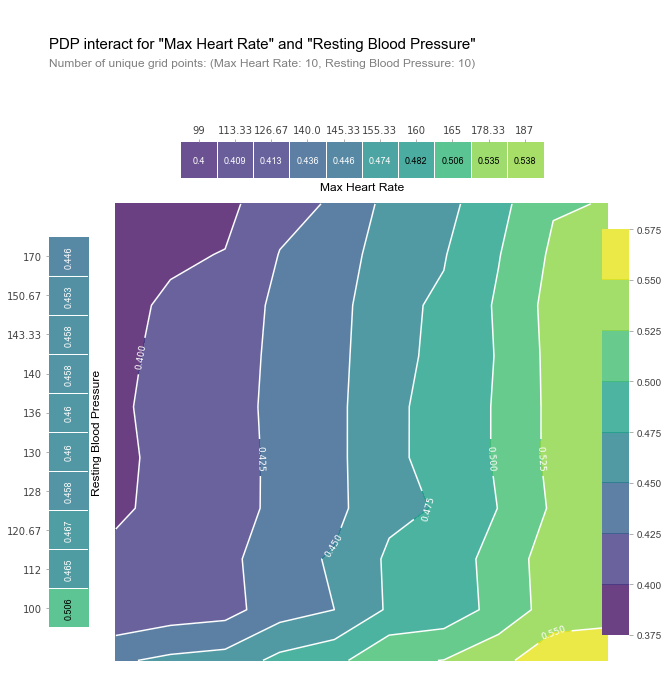

In [78]:
feat_name1 = 'Max Heart Rate'
nick_name1 = 'Max Heart Rate'
feat_name2 = 'Resting Blood Pressure'
nick_name2 = 'Resting Blood Pressure'

inter = pdp.pdp_interact(
model=model,dataset=X_test,model_features=base_features,features=[feat_name1,feat_name2])

fig,axes = pdp.pdp_interact_plot(
pdp_interact_out=inter,feature_names=[nick_name1,nick_name2],plot_type='contour',x_quantile=True,plot_pdp=True)#,plot_pts_dist=True)
